#Computer Vision Midterm Assignment
## Introduction
Welcome to your Computer Vision midterm project! Here, you'll get hands-on experience building an image recognition model using Convolutional Neural Networks and transfer learning.


##Install Necessary Libraries:

In [1]:
#!pip install tensorflow
#!pip install keras
#!pip install numpy
#!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Additional libraries for data loading (if using a custom dataset)
# from skimage.io import imread  # Example for loading images


**Dataset Selection and Loading**

* **Choose Your Dataset**
   * **Standard Datasets:** CIFAR-10, CIFAR-100, or a suitable subset of ImageNet are good starting points. You can use built-in functions to load them.
   * **Custom Dataset:** If you propose a custom dataset, ensure it has sufficient images per class, good quality, and accurate labeling. You'll need to upload it to Colab.
   * **Select your dataset and uncomment the appropriate loading code.**
   * **If you are using a custom dataset, make sure you have uploaded it to Colab and adjust the file path.**

In [3]:
# Option 1: CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

**Markdown Cell: Exploratory Data Analysis (EDA)**

* **Instructions:**
    * Visualize a few random images from your dataset to understand its content and overall quality.
    * Check the shape of your data to confirm the number of images and their dimensions.

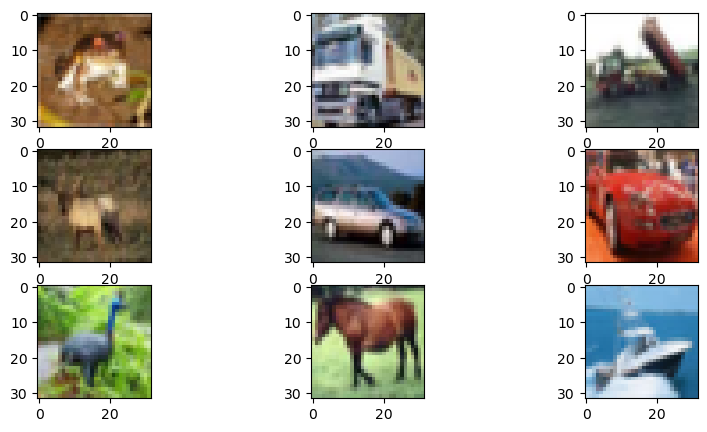

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Class Distribution (Top 10):
[(0, 50000)]


In [4]:
# Insert codode here
# Insert code here to display a few sample images from the dataset
## Display sample images
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.show()
#
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

# Explore class distribution (if using a standard dataset)
from collections import Counter
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train, axis=1)).most_common(10))

**Image Preprocessing**

* **Instructions:**
    1. **Normalization:**
       * Normalize pixel values (usually to the range of 0-1 or -1 to 1)  
    2. **Resizing:**
       * Resize images to a consistent size for model input.

In [5]:
# Insert code here to normalize images
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
import tensorflow as tf

# Define batch size
batch_size = 32

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
test_dataset = tf.data.Dataset.from_tensor_slices(x_test)

# Resize images in batches during training
train_dataset = train_dataset.batch(batch_size).map(lambda x: tf.image.resize(x, (128, 128)))

# Resize images in batches during testing
test_dataset = test_dataset.batch(batch_size).map(lambda x: tf.image.resize(x, (128, 128)))


# ** Data Augmentation **

* **Instructions:**

1. Experiment with Parameters:  The code below has some example data augmentation parameters. Try changing the values within these parameters, or even adding new augmentation techniques! Here's a short guide:

* Hint 1: Start with small adjustments to see the effects clearly.
* Hint 2: Consider which augmentations make sense for your dataset. Flipping images of letters might be okay, but rotating them too much could make them unreadable!

* Explore more: Try adding things like shear_range (for shearing transformations) or zoom_range (for random zooming).

2. Visualize the Effects: After setting up your ImageDataGenerator, add a few lines of code to display some randomly augmented images from your dataset. This will help you see how your chosen parameters change the images.
* Hint: Use a small sample of images so it's easy to compare the originals with the augmented versions.

In [7]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)
       # Add more augmentations if desired

#Model Building (Transfer Learning)

In [8]:
# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:-10]:
    layer.trainable = False
  # Adjust the number of layers to freeze as needed

num_classes = 10

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

In [11]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=20,  # Adjust as needed
    validation_data=(x_test, y_test),
    callbacks=[checkpoint]
)

Epoch 1/20


1563/1563 [==============================] - ETA: 0s - loss: 1.7740 - accuracy: 0.0961
Epoch 1: val_loss improved from inf to 2.94757, saving model to best_model.h5


C:\Users\kboyd\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 67s 39ms/step - loss: 1.7740 - accuracy: 0.0961 - val_loss: 2.9476 - val_accuracy: 0.0257
Epoch 2/20
1563/1563 [==============================] - ETA: 0s - loss: 1.6117 - accuracy: 0.0910
Epoch 2: val_loss improved from 2.94757 to 2.13883, saving model to best_model.h5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.6117 - accuracy: 0.0910 - val_loss: 2.1388 - val_accuracy: 0.1610
Epoch 3/20
1563/1563 [==============================] - ETA: 0s - loss: 1.5670 - accuracy: 0.0959
Epoch 3: val_loss improved from 2.13883 to 1.51699, saving model to best_model.h5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.5670 - accuracy: 0.0959 - val_loss: 1.5170 - val_accuracy: 0.1003
Epoch 4/20
1563/1563 [==============================] - ETA: 0s - loss: 1.5306 - accuracy: 0.0928
Epoch 4: val_loss improved from 1.51699 to 1.40971, saving model to best_model.h5
1563/1563 [==============================] - 61s 39ms/s

# Model Training




#Enhanced Training

Implement data augmentation within the training loop.
Add callbacks to monitor progress and save the best performing model.
Modify the Training Code: If you haven't already, we need to make a few changes to your training loop:

1.   Integrate the Data Augmentation: Replace the
direct use of x_train with datagen.flow(x_train, y_train, batch_size=32). This will apply your augmentations in real-time during training
2.   Use the Validation Set: We already have validation_data=(x_test, y_test).
3. Save the Best Model: We're using a ModelCheckpoint callback to automatically save the model if its performance on the validation set improves
* Hint: Experiment with different batch sizes as well.

In [12]:
from keras.utils import to_categorical

# One-hot encode the target labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Define the ImageDataGenerator for data augmentation
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)
datagen_train.fit(x_train)

# Define ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_accuracy_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Train the model with data augmentation
history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint]
)

Epoch 1/20
1562/1563 [============================>.] - ETA: 0s - loss: 1.3557 - accuracy: 0.0968
Epoch 1: val_accuracy improved from -inf to 0.10990, saving model to best_accuracy_model.h5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.3557 - accuracy: 0.0968 - val_loss: 1.2327 - val_accuracy: 0.1099
Epoch 2/20
1562/1563 [============================>.] - ETA: 0s - loss: 1.3576 - accuracy: 0.0956
Epoch 2: val_accuracy did not improve from 0.10990
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3575 - accuracy: 0.0955 - val_loss: 1.1232 - val_accuracy: 0.0832
Epoch 3/20
1563/1563 [==============================] - ETA: 0s - loss: 1.3505 - accuracy: 0.0984
Epoch 3: val_accuracy did not improve from 0.10990
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3505 - accuracy: 0.0984 - val_loss: 1.1567 - val_accuracy: 0.0837
Epoch 4/20
1563/1563 [==============================] - ETA: 0s - loss: 1.3485 - accuracy: 0.0973
Epoch 4: 

#Visualizing Training Progress

Importance of Monitoring: Explain why tracking validation metrics helps identify overfitting or underfitting.

*   Plot training and validation accuracy/loss curves.


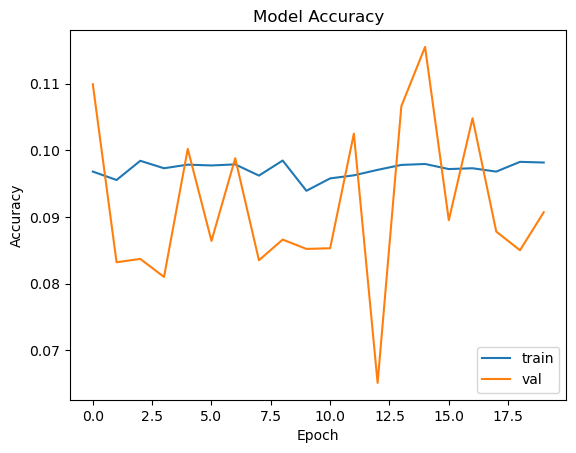

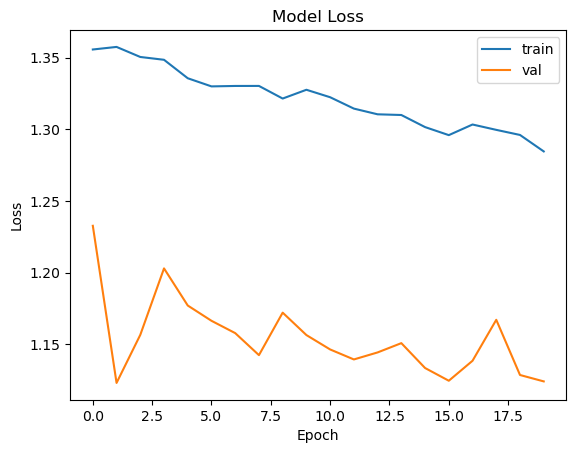

In [13]:
# Plot training and validation curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


#Evaluation on the Test Set

Discuss how test set metrics provide the most unbiased assessment of model performance.

In [14]:
from keras.models import load_model

best_model = load_model('best_accuracy_model.h5')
test_loss, test_acc = best_model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


313/313 [==============================] - 13s 20ms/step - loss: 1.1335 - accuracy: 0.1155
Test Loss: 1.133549690246582
Test Accuracy: 0.11550000309944153


#Hyperparameter Tuning

>Exploring Learning Rates: In the provided code, we're iterating through different learning rates.
* Hint 1: A good starting range for the learning rate is often between 0.01 and 0.0001.
* Hint 2: Pay close attention to how quickly the validation loss starts to increase (if it does), which might signal a learning rate that's too high.



In [15]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of y_train: (50000, 1)
Shape of y_test: (10000, 1)


In [16]:
from keras.utils import to_categorical

# Convert the target labels to one-hot encoded format
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)


Shape of y_train_encoded: (50000, 10)
Shape of y_test_encoded: (10000, 10)


In [23]:
from keras.optimizers import Adam

def create_model(learning_rate=0.01):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Training with different learning rates
for lr in [0.01, 0.001, 0.0001]:
    model = create_model(learning_rate=lr)
    history = model.fit(x_train, y_train_encoded, epochs=10, validation_data=(x_test, y_test_encoded))


Epoch 1/10
1563/1563 [==============================] - 30s 16ms/step - loss: 2.0843 - accuracy: 0.2350 - val_loss: 1.9055 - val_accuracy: 0.3003
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.9831 - accuracy: 0.2656 - val_loss: 1.9488 - val_accuracy: 0.2785
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9753 - accuracy: 0.2697 - val_loss: 1.8499 - val_accuracy: 0.3204
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9641 - accuracy: 0.2751 - val_loss: 1.8486 - val_accuracy: 0.3200
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9484 - accuracy: 0.2797 - val_loss: 1.8406 - val_accuracy: 0.3299
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.9510 - accuracy: 0.2785 - val_loss: 1.8720 - val_accuracy: 0.3128
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.9437 - accuracy: 0.2838 - val_loss: 1.8575 -

In [24]:
from keras.utils import to_categorical

# Define evaluate_model function
def evaluate_model(model, x_test, y_test_encoded):

# Assuming y_test is the integer label array
    y_test_encoded = to_categorical(y_test)

# Now, you can pass y_test_encoded to the evaluate_model function
    evaluate_model(model, x_test, y_test_encoded)


In [25]:
# Assuming you've trained the model and made predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("Shape of y_pred:", y_pred.shape)

print("Shape of y_test_encoded:", y_test_encoded.shape)

313/313 [==============================] - 1s 3ms/step
Shape of y_pred: (10000, 10)
Shape of y_test_encoded: (10000, 10)


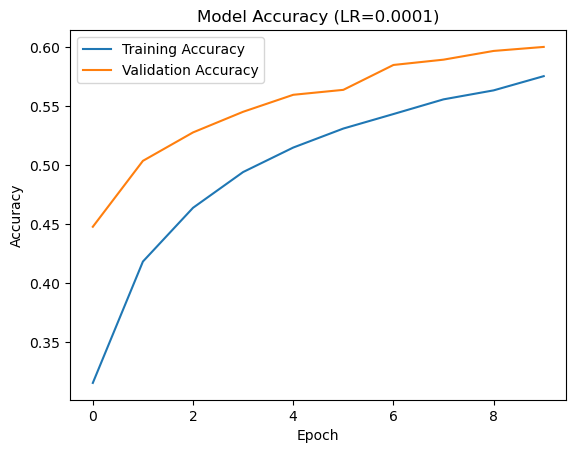

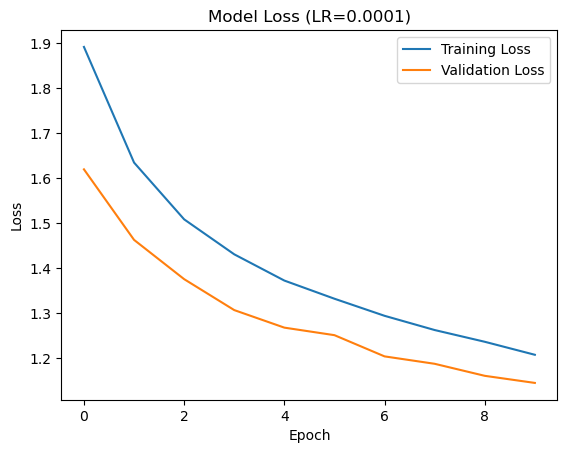

Test Loss: 1.1447784900665283
Test Accuracy: 0.6003999710083008


In [26]:
# Plot the training curves and evaluate the model once more.
import matplotlib.pyplot as plt

# Plot training and validation curves
def plot_curves(history, learning_rate):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy (LR={learning_rate})')  # Include learning rate in the title
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss (LR={learning_rate})')  # Include learning rate in the title
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print('Test Loss:', test_loss)
    print('Test Accuracy:', test_accuracy)

# Example usage:
# Assuming `history` contains the training history of a model and `lr` is the learning rate used
plot_curves(history, lr)

# Assuming `model` is the trained model and `x_test`, `y_test` are the test data
evaluate_model(model, x_test, y_test_encoded)



#Confusion Matrx

Confusion Matrix:
[[642  44  57  15   5   5  12   9 165  46]
 [ 25 772   5   9   4   4   9   7  56 109]
 [ 98  17 494  71  64  61  89  49  40  17]
 [ 25  19 106 426  50 151  98  54  26  45]
 [ 40  13 214  78 369  46 114  99  20   7]
 [ 18   3 120 168  39 464  45  98  29  16]
 [ 13  11  78  70  45  13 728  15   9  18]
 [ 26   7  49  54  42  68  16 692  13  33]
 [ 78  75   9   8   1   9   6   7 766  41]
 [ 35 173  13  14   2   7  17  27  61 651]]


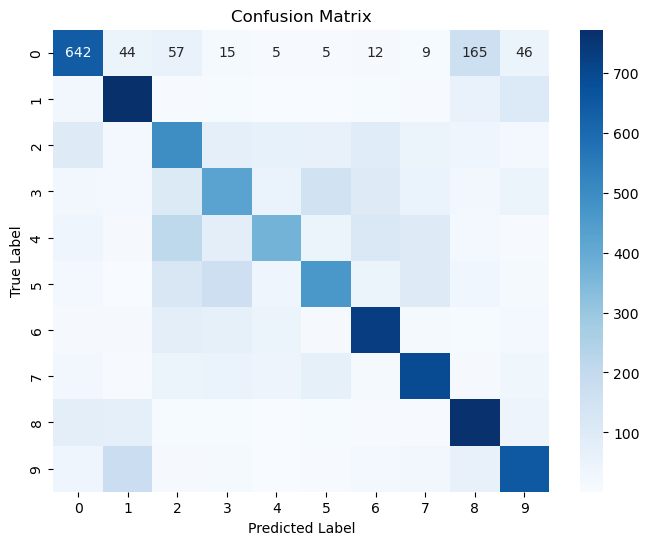

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1000
           1       0.68      0.77      0.72      1000
           2       0.43      0.49      0.46      1000
           3       0.47      0.43      0.45      1000
           4       0.59      0.37      0.46      1000
           5       0.56      0.46      0.51      1000
           6       0.64      0.73      0.68      1000
           7       0.65      0.69      0.67      1000
           8       0.65      0.77      0.70      1000
           9       0.66      0.65      0.66      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels and y_pred_classes contains the predicted labels
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate classification report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)


In [28]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)

# Print the test loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


Test Loss: 1.1447784900665283
Test Accuracy: 0.6003999710083008


#Discussion and Further Exploration

##Questions to consider:
1. How does the choice of pre-trained model (VGG16, ResNet50, etc.) affect the results?
2. Analyze the confusion matrix: Are errors more common between certain classes? What might explain this?
3. Experiment with different degrees of fine-tuning (freezing more/fewer layers of the pre-trained model).
4. If applicable to your dataset, can you collect more data for classes with higher error rates?
What are other ways to potentially improve accuracy? (e.g., ensembling models, exploring advanced augmentation strategies, class-weighted training)

Sources
towardsdatascience.com/build-your-own-deep-learning-classification-model-in-keras-511f647980d6
stackoverflow.com/questions/69997327/tensorflow-valueerror-input-0-is-incompatible-with-layer-model-expected-shape
www.influxdata.com/blog/time-series-forecasting-with-tensorflow-influxdb/